# Implementation and Evaluation of Gradient Descent Algorithm
## Along with Regularization
## Namrata Deshpande
### Feb 23, 2017


---

## Introduction 
We will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing) for implementing gradient descent algorithm for Linear and Logistic regression from scratch. 

In [1]:
#importing libraries
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf



In [2]:
#loading boston data from sklearn 
from sklearn.datasets import load_boston
bdata = load_boston()

---

## Part 1: Pre Processing


### 1.1 Use existing libraries

First, let's use the linear regression version that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, we will use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn to explore the relationship between  median housing price and number of rooms per house. We will do this in two steps:

(a) regressing the housing price on the number of rooms per house, and then 

(b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  

In [3]:
#variables in boston dataset
print (bdata.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.keys()
# print bdata.feature_names
# print bdata.data.shape
# print bdata.target.shape
# print bdata.DESCR

# converting boston data to dataframe and setting column names
boston_df = pd.DataFrame(bdata.data)
boston_df.columns=bdata.feature_names
#adding median values data to the dataframe
boston_df['MEDV']=bdata.target




In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
#selecting only the variables required for model fitting
df = boston_df[['RM', 'MEDV']]
#sorting values to make graph pretty
df = df.sort_values(by = 'RM', axis=0)
#converting to array
X = np.array(df['RM']).reshape(len(boston_df),1)
y= np.array(df['MEDV']).reshape(len(boston_df),1)
#initializing instance of Linear Regression
lm1 = linear_model.LinearRegression()
#fitting the model between RM and MEDV
lm1.fit(X, y)


#estimated coefficients
coeff_model1 = lm1.coef_
print('Estimated Coefficients and Intercept for Linear Regression Model: ')
#creating dataframe with variable name and coefficients and R-squared value
data = { 'Estimated Coefficients': [lm1.intercept_[0], lm1.coef_,lm1.score(X,y) ],
        'Variable/Measure': ['Intercept','RM', 'R-Squared']}
coeff = pd.DataFrame(data)
coeff.head()




Estimated Coefficients and Intercept for Linear Regression Model: 


,Estimated Coefficients,Variable/Measure
0,-34.6706,Intercept
1,[[9.10210898118]],RM
2,0.483525,R-Squared


In [6]:
# Fitting model with degree 2
poly = PolynomialFeatures(degree=2)
#transforming data to include 2nd degree features
X_= poly.fit_transform(X)
#initializing instance of Linear model
lm2 = linear_model.LinearRegression()
#fitting polynomial model
lm2.fit(X_, y)


#estimated coefficients
print('Estimated Coefficients for Polynomial Regression Model: ')
#creating dataframe with variable name and coefficients and R-squared value
data = { 'Estimated Coefficients': [lm2.intercept_, lm2.coef_[0][1],lm2.coef_[0][2],lm2.score(X_,y) ],
        'Variable/Measure': ['Intercept','RM', 'RM**2', 'R-Squared']}
coeff = pd.DataFrame(data)
coeff.head()


Estimated Coefficients for Polynomial Regression Model: 


,Estimated Coefficients,Variable/Measure
0,[66.0588474848],Intercept
1,-22.6433,RM
2,2.47012,RM**2
3,0.548426,R-Squared


The estimated coefficient for Number of Rooms in linear regression model in the first part above, indicates towards high positive correlation between the Rooms and Median housing prices as with an estimate close to 9.0 we can say that with 1 unit increase in Number of Rooms variable, there is about 9 units increase in the Median housing prices, which is very significant. However, the low value of R-squared indicates that model could be improved further.

After looking at the estimated coefficients for polynomial model with degree two, we can see that the squared value of RM variable have a positive relation with MEDV and the effect of RM is totally reversed. This tells us that the relation between the two variables is not linear. Higher degrees of RM have greater impact on MEDV.

### 1.2 Cross Validation


Now, using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, we will use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give us one slope coefficient and one intercept coefficient.  We will then plot the distribution of the 250 slope coefficients using a histogram.

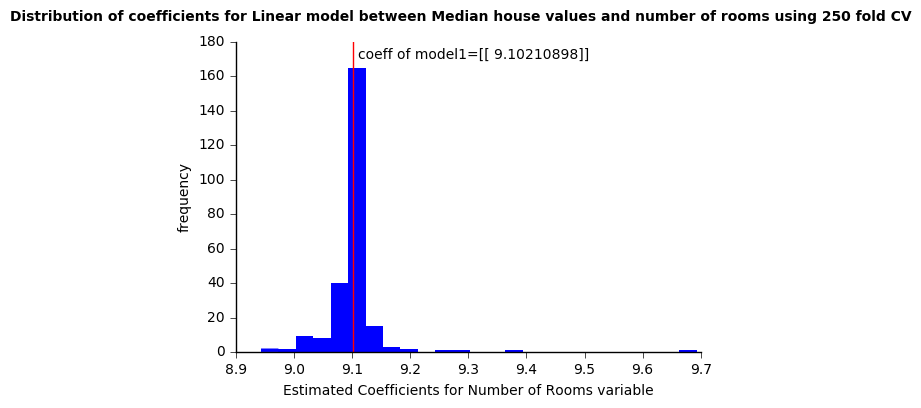

In [7]:
from sklearn.model_selection import KFold
from sklearn import linear_model
#creating instance of linear regression
lm = linear_model.LinearRegression()
#creating KFold iterator with 250 folds
kf = KFold(n_splits=250)
#creating array of explanatory variable values
X = np.array(boston_df['RM']).reshape(len(boston_df),1)
#dependent variable values array
y= np.array(boston_df['MEDV']).reshape(len(boston_df),1)
#fitting model on training data in each of the 250 folds and saving the estimated coefficient in an array
slopes =  [lm.fit(X[train], y[train]).coef_[0][0] for train, test in kf.split(X,y)]

fig = plt.figure()
ax = fig.add_subplot(111)
#plotting histogram of all estimated coefficients during 250 fold CV
plt.hist(slopes ,bins = 25,  facecolor='b', edgecolor = "none")
#vertical line for estimated coefficient by model 1 above
plt.axvline(x= coeff_model1, color = 'red')
plt.text(9.11, 170, 'coeff of model1='+ str(coeff_model1))
#removing top and right ticks
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#setting labels for axes and title of graph
plt.xlabel('Estimated Coefficients for Number of Rooms variable')
plt.ylabel('frequency')
fig.suptitle('Distribution of coefficients for Linear model between Median house values and number of rooms using 250 fold CV',
             fontweight='bold', fontsize = 10)
ax.tick_params(axis='both', direction='out') 
# remove unneeded ticks 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.show()

The estimated coefficients given by 250-fold CV, forms almost a normal distribution with maximum frequency near the mean as shown by the histogram above. Furthermore, the estimated coefficient of model 1 is very near to the mean of the distribution of coefficients by 250-fold CV as clear from the plot. This result is similar to that given by Central Limit Theorem.

### 1.3 Regression lines

Now we will create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1. 

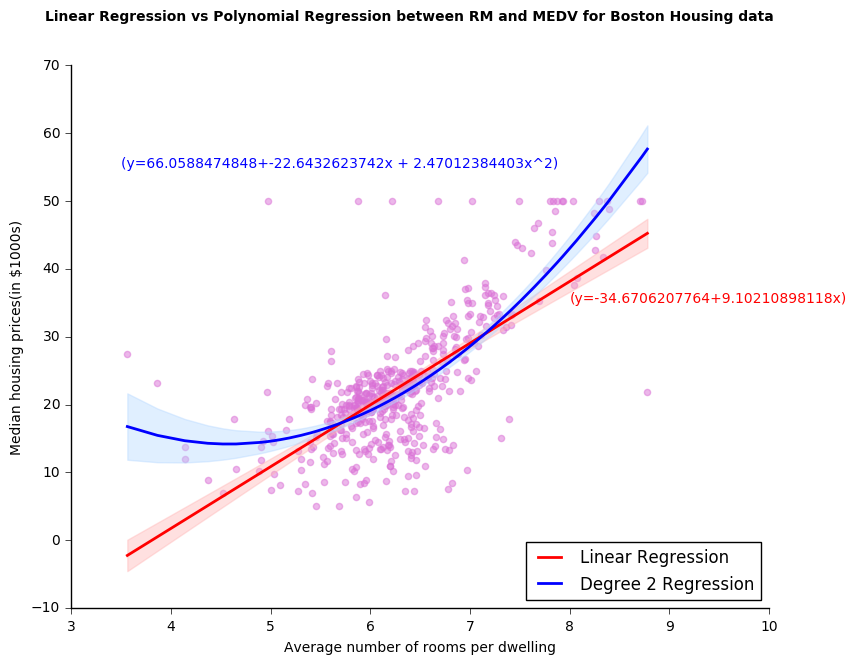

In [8]:
from scipy import stats
#Explanatory and dependent variable
X = np.array(df['RM']).reshape(len(df),1)
y= np.array(df['MEDV']).reshape(len(df),1)
#predictions for first model
y_hat_1 = lm1.predict(X);
#error for first model
y_err_1 = y - y_hat_1
#mean values 
mean_x = X.T[0].mean()
#number of records
n = len(X)
#degree of freedom for this model
dof = n - 1 - 1
#t stat for 95% conf interval and given dof
t = stats.t.ppf(1-0.025, df=dof)
#error for model 1
s_err_1 = np.sum(np.power(y_err_1, 2))
#calculating 95% conf interval on fitted values
conf_1 = t * np.sqrt((s_err_1/(n-2))*(1.0/n + (np.power((X-mean_x),2) / ((np.sum(np.power(X,2))) - n*(np.power(mean_x,2))))))
upper_1 = y_hat_1 + abs(conf_1)
lower_1 = y_hat_1 - abs(conf_1)

#tranforming for degree 2 fit
X_= poly.fit_transform(X)
#predicted values for model 2
y_hat_2 = lm2.predict(X_)
#error for second model
y_err_2 = y - y_hat_2
#mean of x values
mean_x = np.mean(X_,axis = 0)
#number of records
n = len(X_)
#degree of freesom for this model
dof = n - X_.shape[1] - 1
#t stat for 95% conf interval and given dof
t = stats.t.ppf(1-0.025, df=dof)
#error for sencond model
s_err_2 = np.sum(np.power(y_err_2, 2))
#calculating confidence interval for fitted values
x = X_.T
a=[]
#traversing on rows to find conf interval for each fitted value
for i in range(0, x.shape[1]):
    xp = x[:,i]
    intvrl = np.sqrt((s_err_2/(n-2)) *np.dot(np.dot(xp.T,(np.linalg.inv(np.dot(X_.T,X_)))),xp))
    a.append(intvrl)
conf_2 = t * (np.array(a).reshape(len(a),1))
upper_2 = y_hat_2 + abs(conf_2)
lower_2 = y_hat_2 - abs(conf_2)

#plotting regression lines
fig, ax = plt.subplots(figsize=(9, 7))
#plotting scatter plot between RM and MEDV
ax.scatter(boston_df['RM'], boston_df['MEDV'], alpha=0.5, color='orchid', label = "")
#regression line for first model
plt.plot(X, y_hat_1, color='red',label ="Linear Regression", linewidth=2)
#adding equation label
plt.text(8, 35, '(y='+ str(lm1.intercept_[0]) +'+'+ str(coeff_model1[0][0])+"x)", color = 'red')
#adding confidence interval
ax.fill_between(X[:,0], lower_1[:,0], upper_1[:,0], color='#ffb3b3',alpha=0.4)
#plotting line for second model
plt.plot(X, y_hat_2, color='blue',label ="Degree 2 Regression", linewidth=2)
#labelling equation for model
plt.text(3.5, 55, '(y='+ str(lm2.intercept_[0]) +'+'+ str(lm2.coef_[0][1])+"x + " + str(lm2.coef_[0][2]) + "x^2)" , 
         color = 'blue')
#adding confidence interval
ax.fill_between(X[:,0], lower_2[:,0], upper_2[:,0], color='#b3d7ff', alpha=0.4)
#setting labels for axes and title of graph
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median housing prices(in $1000s)')
fig.suptitle('Linear Regression vs Polynomial Regression between RM and MEDV for Boston Housing data',
             fontweight='bold', fontsize = 10)
#removing top and right ticks
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='both', direction='out') 
# remove unneeded ticks 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
#setting location of legend
plt.legend(loc='lower right')
plt.show()



## Part 2: Gradient descent: Linear Regression



### 2.1 Gradient descent with one independent variable (Average rooms per house)

Now we will implement the batch gradient descent algorithm then use this version to regress the housing price on the number of rooms per house. We will experiment with 3-4 different values of the learning rate *R*, and note the following:

* the values of alpha and beta that minimize the loss function
* the number of iterations it takes for the algorithm to converge (for each value of *R*)
* the total running time of your algorithm, in seconds


In [9]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient

final_stats: list
    list with final cost, final iterations and timetaken by algo
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    # initialize the parameters
    start_time = time.time()
    iteration = 0
    converge = False
    size = xvalues.size
    
    
    #choosing random initial values
    alpha = np.random.random(1)
    beta = np.random.random(1)
    
    #initial predictions
    predictions = alpha + (beta *xvalues)
    
    #cost function initial
    cost = np.sum((predictions- yvalues)**2) / (2*size)
    
    #iterate until convergence or max iterations
    while ((iteration <= MaxIterations) and (converge ==False)) :
        #gradients for the coefficients
        a_grad = np.sum (predictions - yvalues) * (1.0/size)
        b_grad = np.sum (np.multiply((predictions - yvalues), xvalues))* (1.0/size)
        #new estimates by substracting learning rate * gradient
        alpha_new = alpha - (R * a_grad)
        beta_new = beta - (R * b_grad)
        #new prediction
        predictions_new = alpha_new + (beta_new *xvalues)
        #new cost function
        cost_new = np.sum((predictions_new - yvalues)**2) / (2*size)
        #find if converged?
        if abs(cost_new - cost)<= 0.0001:
            #converged case
            converge = True
        
        cost = cost_new
        alpha = alpha_new
        beta = beta_new
        predictions = predictions_new
        iteration = iteration + 1
        
    time_taken = str(round(time.time() - start_time,2))
    final_stats = [cost, iteration, time_taken ]           
    return alpha, beta, final_stats



In [10]:
# example function call
X = np.array(boston_df['RM'])
y= np.array(boston_df['MEDV'])
#taking learning rate as 0.01
intercept, slope, final_stats = bivariate_ols(X, y, 0.01, 100000)
print("Bivariate batch gradient descent between RM and MEDV with R = 0.01")
print("Intercept  =", intercept)
print("Estimated coefficient =", slope)
print("Final cost  =", final_stats[0])
print("Number of iterations to converge", final_stats[1])
print("time taken ", final_stats[2] + " seconds")

Bivariate batch gradient descent between RM and MEDV with R = 0.01
Intercept  = [-26.45622983]
Estimated coefficient = [ 7.81076508]
Final cost  = 22.2159549642
Number of iterations to converge 12293
time taken  0.44 seconds


In [11]:
#learning rate as 0.05
intercept, slope, final_stats = bivariate_ols(X, y, 0.05, 100000)
print("Bivariate batch gradient descent between RM and MEDV with R = 0.05")
print("Intercept  =", intercept)
print("Estimated coefficient =", slope)
print("Final cost  =", final_stats[0])
print("Number of iterations to converge", final_stats[1])
print("time taken ", final_stats[2] + " seconds")

Bivariate batch gradient descent between RM and MEDV with R = 0.05
Intercept  = [ nan]
Estimated coefficient = [ nan]
Final cost  = nan
Number of iterations to converge 100001
time taken  3.09 seconds


In [12]:
#learning rate as 0.047
intercept, slope, final_stats = bivariate_ols(X, y, 0.047, 100000)
print("Bivariate batch gradient descent between RM and MEDV with R = 0.047")
print("Intercept  =", intercept)
print("Estimated coefficient =", slope)
print("Final cost  =", final_stats[0])
print("Number of iterations to converge", final_stats[1])
print("time taken ", final_stats[2] + " seconds")

Bivariate batch gradient descent between RM and MEDV with R = 0.047
Intercept  = [-30.88283834]
Estimated coefficient = [ 8.50665038]
Final cost  = 21.8886606649
Number of iterations to converge 3974
time taken  0.13 seconds


In [13]:
#learning rate as 0.045
intercept, slope, final_stats = bivariate_ols(X, y, 0.045, 100000)
print("Bivariate batch gradient descent between RM and MEDV with R = 0.045")
print("Intercept  =", intercept)
print("Estimated coefficient =", slope)
print("Final cost  =", final_stats[0])
print("Number of iterations to converge", final_stats[1])
print("time taken ", final_stats[2] + " seconds")

Bivariate batch gradient descent between RM and MEDV with R = 0.045
Intercept  = [-30.80013827]
Estimated coefficient = [ 8.49364951]
Final cost  = 21.8925622736
Number of iterations to converge 4129
time taken  0.14 seconds


After trying different values of R we find that the cost is minimum at R=0.047. If we increase it then the algorithm is not converging even after max iterations of 100000 and we are getting NAN values. If we are decreasing it to 0.045 then the cost function is increasing. SO, we can say that R=0.047 gives us optimal values of the coefficients. 

### 2.2 Data normalization 

We should always normalize the features in order to get unbaised results. We will use the below function to standarize the features we are using.

In [14]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Gradient descent with an arbitrary number of independent variables

Now we will create a version of gradient descent that can take more than one independent variable.  We will assume all independent variables will be continuous and test the algorithm using CRIM and RM as independent variables. Also, we will standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  we will note the estimated coefficients, the number of iterations before convergence, and the total running time of the algorithm and experiment with 2-3 different values of R.


In [15]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient

final_stats: list
    list with final cost, final iterations and timetaken by algo

"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
     # initialize the parameters
    start_time = time.time()
    iteration = 0
    converge = False
    size = xvalue_matrix.shape[0]
    #inseting 1s for intercept estimation
    xvalue_matrix = np.insert(xvalue_matrix, 0, 1, axis=1)
    #initial random values for estimates
    theta = np.random.random(xvalue_matrix.shape[1])
    #initial predictions, error and cost
    predictions = np.dot(xvalue_matrix, theta)
    err = predictions-yvalues
    #normalized cost function is used in this algo
    cost = np.sum(err ** 2) / (2 * size)
    #iterate until converge or max iterations
    while ((iteration <= MaxIterations) and (converge ==False)):
        #calculate gradient
            grad = np.dot(xvalue_matrix.transpose(), err) / size     
            #new estimates
            theta = theta - (R * grad)
            #new predictions, cost and error
            predictions_new = np.dot(xvalue_matrix, theta)
            err_new = predictions_new-yvalues
            cost_new = np.sum(err_new ** 2) / (2 * size)
            #check whether converged
            if abs(cost_new - cost)<= 0.0001:
                #converged case
                converge = True
        
            cost = cost_new
            err = err_new
            predictions = predictions_new
            iteration = iteration + 1
        
    time_taken = str(round(time.time() - start_time,2))
    final_stats = [cost, iteration, time_taken ]
    alpha = theta[0]
    beta_array = theta[1: theta.size] 
    return alpha, beta_array, final_stats

In [16]:
#prepare data for explanatory and dependent variable
X = boston_df[['RM','CRIM']]
X= np.array(standardize(X))
y= np.array(boston_df['MEDV'])
#taking R = 0.001
intercept, slopes, final_stats = multivariate_ols(X, y, 0.001, 100000)
print("Multivariate Batch Gradient Descent between RM, CRIM and MEDV with R = 0.001")
print("Intercept for Model=", intercept)
print("Estimate for RM = ", slopes[0])
print("Estimate for CRIM = ", slopes[1])
print("Final Cost = ", final_stats[0])
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")


Multivariate Batch Gradient Descent between RM, CRIM and MEDV with R = 0.001
Intercept for Model= 22.2241920587
Estimate for RM =  5.82268747574
Estimate for CRIM =  -2.27520767375
Final Cost =  19.4445762379
Number of Iterations =  4274
Time Taken for calculation =  0.09 seconds


In [17]:
#taking R = 0.05
intercept, slopes, final_stats = multivariate_ols(X, y, 0.01, 100000)
print("Multivariate Batch Gradient Descent between RM, CRIM and MEDV with R = 0.01")
print("Intercept for Model=", intercept)
print("Estimate for RM = ", slopes[0])
print("Estimate for CRIM = ", slopes[1])
print("Final Cost = ", final_stats[0])
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")

Multivariate Batch Gradient Descent between RM, CRIM and MEDV with R = 0.01
Intercept for Model= 22.4364936847
Estimate for RM =  5.8699414536
Estimate for CRIM =  -2.26146208912
Final Cost =  19.3993991932
Number of Iterations =  539
Time Taken for calculation =  0.01 seconds


In [18]:
#taking R = 0.1
intercept, slopes, final_stats = multivariate_ols(X, y, 0.1, 100000)
pred = intercept + slopes[0] * X[:,0] + slopes[1] * X[:,1]
#RMSE over remaining test set
rmse = np.sqrt(np.mean((np.subtract(y,pred))**2))
print("Multivariate Batch Gradient Descent between RM, CRIM and MEDV with R = 0.1")
print("Intercept for Model=", intercept)
print("Estimate for RM = ", slopes[0])
print("Estimate for CRIM = ", slopes[1])
print("Final Cost = ", final_stats[0])
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")
print("Computed RMSE=", rmse)

Multivariate Batch Gradient Descent between RM, CRIM and MEDV with R = 0.1
Intercept for Model= 22.5066714635
Estimate for RM =  5.88636543901
Estimate for CRIM =  -2.25456445217
Final Cost =  19.394829318
Number of Iterations =  64
Time Taken for calculation =  0.0 seconds
Computed RMSE= 6.22813444267


The above observations tells us that the optimal estimates are found at R=0.1. At this value the cost function is the lowest among all the values tested above. Also, the number of iterations taken to converge as time is also the least for this value of R.

### 2.4 Comparing standardized vs. non-standardized results

We will repeat the analysis from 2.3, but this time do not standardize the variables - i.e., use the original data. We will use the same three values of R (0.1, 0.01, and 0.001) and note changes in the running time and convergence properties of the algorithm?

In [19]:
#data without standarization
X = boston_df[['RM','CRIM']]
X= np.array(X)

y= np.array(boston_df['MEDV'])
#taking R = 0.001
intercept, slopes, final_stats =multivariate_ols(X, y, 0.001, 100000)
print("Multivariate Batch Gradient Descent between RM, CRIM and MEDV without standarization with R = 0.001")
print("Intercept for Model=", intercept)
print("Estimate for RM = ", slopes[0])
print("Estimate for CRIM = ", slopes[1])
print("Final Cost = ", final_stats[0])
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")


Multivariate Batch Gradient Descent between RM, CRIM and MEDV without standarization with R = 0.001
Intercept for Model= -1.41033777574
Estimate for RM =  4.06250393334
Estimate for CRIM =  -0.35498689966
Final Cost =  23.8573657784
Number of Iterations =  6156
Time Taken for calculation =  0.13 seconds


In [20]:
#taking R=0.01
intercept, slopes, final_stats =multivariate_ols(X, y, 0.01, 100000)
print("Multivariate Batch Gradient Descent between RM, CRIM and MEDV without standarization with R = 0.01")
print("Intercept for Model=", intercept)
print("Estimate for RM = ", slopes[0])
print("Estimate for CRIM = ", slopes[1])
print("Final Cost = ", final_stats[0])
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")

Multivariate Batch Gradient Descent between RM, CRIM and MEDV without standarization with R = 0.01
Intercept for Model= -20.4827294487
Estimate for RM =  7.02684114117
Estimate for CRIM =  -0.291280381694
Final Cost =  19.8406321539
Number of Iterations =  10997
Time Taken for calculation =  0.22 seconds


In [21]:
#taking R=0.1
intercept, slopes, final_stats =multivariate_ols(X, y, 0.1, 100000)
print("Multivariate Batch Gradient Descent between RM, CRIM and MEDV without standarization with R = 0.1")
print("Intercept for Model=", intercept)
print("Estimate for RM = ", slopes[0])
print("Estimate for CRIM = ", slopes[1])
print("Final Cost = ", final_stats[0])
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")

Multivariate Batch Gradient Descent between RM, CRIM and MEDV without standarization with R = 0.1
Intercept for Model= nan
Estimate for RM =  nan
Estimate for CRIM =  nan
Final Cost =  nan
Number of Iterations =  100001
Time Taken for calculation =  1.98 seconds


The above observations tells us that if the data is not standarized then the number of iterations taken by the algorithm has increased as compared to standarized results and with R=0.1 where we were getting the optimal results with standarized data in only 64 iterations, in non-standarize case the algo failed to converge even after max iterations of 100000. Also the running time of algorithm has also increased significantly for non-standarized data. This tells us that for batch gradient descent algorithms we should always standarize the data for optimal results with less resources.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, it would be wise to first standardize your features before proceeding.

### 3.1 Cross-Validation

To avoid overfitting, we will use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and note the estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM).

In [22]:
#initializing k-fold iterator with folds=10 
kf = KFold(n_splits=10, random_state=200)
#preparing data
X = boston_df[['RM','CRIM']]
X= np.array(standardize(X))
y= np.array(boston_df['MEDV'])

intercepts= []
slope_crim = []
slope_rm = []
for train, test in kf.split(X,y):
    intercept, slopes, final_stats = multivariate_ols(X[train], y[train], 0.01, 100000)
    intercepts.append(intercept)
    slope_rm.append(slopes[0])
    slope_crim.append(slopes[1])
#final estimates as mean of k-fold values
intercept = np.mean(intercepts)
slope_crim = np.mean(slope_crim)
slope_rm = np.mean(slope_rm)



In [23]:
#estimates
print("Estimated values by 10-fold cross validation over multivariate batch gradient descent")
print("Intercept= ", intercept)
print("Estimate for CRIM= ", slope_crim)
print("Estimate for RM = ", slope_rm)

Estimated values by 10-fold cross validation over multivariate batch gradient descent
Intercept=  22.4231620598
Estimate for CRIM=  -2.27774973272
Estimate for RM =  5.8632899614


The estimated values of coefficients by 10-fold CV shows slight different in what were estimated by fitting over complete data. But as these values are fitted over training sets, real evaluation of the model could be done over the remaining test sets. 

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. We will compute the RMSE on our test cases, i.e. take the model parameters that we found above and compare the actual to the predicted values for just the test instances. 

In [24]:
rmse_all = []
for train, test in kf.split(X,y):
    #fitting model o training set
    intercept, slopes, final_stats = multivariate_ols(X[train], y[train], 0.01, 100000)
    #predictions for training set
    pred = intercept + slopes[0] * X[test][:,0] + slopes[1] * X[test][:,1]
    #RMSE over remaining test set
    rmse = np.sqrt(np.mean((np.subtract(y[test],pred))**2))
    rmse_all.append(rmse)

#final test RMSE as average of all RSME over all test sets
rmse_final = np.mean(rmse_all)
print("Final Test RMSE for Multivariate Batch Gradient Descent by 10 fold CV = ", rmse_final)    
    

Final Test RMSE for Multivariate Batch Gradient Descent by 10 fold CV =  5.77815920955


The test RMSE using 10 fold CV comes to be arround 5.778. This is very low as compared to the value 9.69317142396 for the K nearest neighbor algorithm for the same variables after normalization. This means that batch gradient descent works very well for optimization of estimates for this kind of data.

# Part 4: Logistic Regression

Now we will implement the logistic regression using gradient descent. For this we will create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Then perform logistic regression of EXPENSIVE on CHAS and RM. 

In [25]:
#creating the new variable as per the conditions
boston_df['EXPENSIVE'] = np.where(boston_df['MEDV']>=40, 1, 0)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,EXPENSIVE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


In [26]:
import math
#logistic sigmoid function for theta and x
def sigmoid_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))
#logistic cost function
def logistic_cost_func(theta, x, y):
    h = sigmoid_func(theta,x)
    J1 = y * np.log(h)
    J2 = (1-y) * np.log(1 - h)
    cost = -J1 - J2
    return np.mean(cost)
#gradient function
def gradient(theta, x, y):
    loss = sigmoid_func(theta, x) - y
    grad = loss.T.dot(x)
    return grad


In [27]:
"""
Function
--------
multivariate_logistic
    Gradient Decent to minimize logistic. Used to find co-efficients of multivariate OLS logistic regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient

final_stats: list
    list with final cost, final iterations and timetaken by algo

"""
def multivariate_logistic(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    iteration = 0
    converge = False
    size = xvalue_matrix.shape[0]
    #inserting 1 for intercept calculation
    xvalue_matrix = np.insert(xvalue_matrix, 0, 1, axis=1)
    #initial random theta values
    theta = np.random.random(xvalue_matrix.shape[1])
    #initial cost
    cost = logistic_cost_func(theta, xvalue_matrix, yvalues)
    #iterate until converged or max iterations
    while ((iteration <= MaxIterations) and (converge ==False)):
        #calculate gradient
        grad = gradient(theta, xvalue_matrix, yvalues)
        #new theta values
        theta = theta - (R * grad)
        #new cost
        cost_new = logistic_cost_func(theta, xvalue_matrix, yvalues)
        #check for convergence
        if abs(cost_new - cost)<= 0.0001:
                #converged case
                converge = True
        iteration = iteration + 1
        cost = cost_new
        
    time_taken = str(round(time.time() - start_time,2))
    final_stats = [cost, iteration, time_taken ]        
    return theta,final_stats

In [28]:
#preparing data
df = pd.DataFrame(standardize(boston_df['RM']))
df['CHAS'] = boston_df['CHAS']
X= np.array(df)
y= np.array(boston_df['EXPENSIVE'])

#fitting logistic regression model using gradient descent
estimates, final_stats = multivariate_logistic(X,y,0.01,10000)
print("Logistic Regression over Expensive, Chas and RM using Batch Gradient Descent with R = 0.01")
print("Intercept for Model=", estimates[0])
print("Estimate for RM = ", estimates[1])
print("Estimate for CHAS = ", estimates[2])
print("Final Cost = ", final_stats[0])
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")



Logistic Regression over Expensive, Chas and RM using Batch Gradient Descent with R = 0.01
Intercept for Model= -4.20140712701
Estimate for RM =  1.94005154464
Estimate for CHAS =  0.677553180418
Final Cost =  0.116751845091
Number of Iterations =  31
Time Taken for calculation =  0.0 seconds


In [29]:
# checking estimates using sklearn Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
y= np.array(boston_df['EXPENSIVE'])
model = model.fit(X, y)
print("Logistic Regression using predefined functions")
print("Intercept for Model=", model.intercept_)
print("Estimate for RM = ", model.coef_[0][0])
print("Estimate for CHAS = ", model.coef_[0][1])

Logistic Regression using predefined functions
Intercept for Model= [-3.86416433]
Estimate for RM =  1.74290871633
Estimate for CHAS =  0.726530673804


The results from the above process tells us that both Number of Rooms as well as Charles river variable have positive association with probability of Median values to be greater than 40k$. We can also notice that the effect of Number of rooms is greater than that of CHAS and there is slight difference in estimates calculated using the two processes.

# Part 5: Regularization 

### 5.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If we originally had *K* features, we should now have *K+K^2/2* features. We will also standardize all of the features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of the data and call this the training set, and set aside the remaining 34% as the test set.

In [30]:
from sklearn.model_selection import train_test_split
#preparing data
df = boston_df.drop('MEDV', axis=1)
X = np.array(standardize(df))
y= np.array(boston_df['MEDV'])
#adding interaction terms for all features
X_t = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)
print(X_t.shape)

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.34, random_state = 200)


(506, 105)


### 5.2 Let's overfit!
Now, using our version of multivariate regression from 2.3, let's overfit the training data. Using the training set, we will regress housing price on as many of those *K+K/2* features as we can.  


In [31]:
#function for computing RMSE from predictions and y values
def compute_rmse(predictions, yvalues):
    #applying formula= RMSE = sqrt(mean((y-yhat)^2)
    rmse = np.sqrt(np.mean((np.subtract(yvalues,predictions))**2))
    return rmse

In [32]:
# with CRIM, ZN, INDUS, CHAS, NOX
xvalues = X_train[:,:5]
intercept, slopes, final_stats = multivariate_ols(xvalues, y_train, 0.001, 100000)
#predictions
pred_train = intercept + np.sum(slopes*X_train[:,:5], axis=1)
pred = intercept + np.sum(slopes*X_test[:,:5], axis=1)
#calculating RMSE
rmse_train = compute_rmse(pred_train, y_train)
rmse = compute_rmse(pred, y_test)
print("Training RMSE for model with 5 features=", rmse_train)
print("Test RMSE for model with 5 features=", rmse)
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")


Training RMSE for model with 5 features= 6.82121163094
Test RMSE for model with 5 features= 8.75665726321
Number of Iterations =  4484
Time Taken for calculation =  0.09 seconds


In [33]:
#with all features but no interaction term
xvalues = X_train[:,:13]
intercept, slopes, final_stats = multivariate_ols(xvalues, y_train, 0.001, 100000)
pred = intercept + np.sum(slopes*X_test[:,:13], axis=1)
rmse = compute_rmse(pred, y_test)
pred_train = intercept + np.sum(slopes*X_train[:,:13], axis=1)
rmse_train = compute_rmse(pred_train, y_train)
print("Training RMSE for model with 13 features=", rmse_train)
print("Test RMSE for model with 13 features=", rmse)
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")

Training RMSE for model with 13 features= 4.50553113741
Test RMSE for model with 13 features= 5.40541708527
Number of Iterations =  5098
Time Taken for calculation =  0.11 seconds


In [34]:
#with all features and 5 interaction terms
xvalues = X_train[:,:18]
intercept, slopes, final_stats = multivariate_ols(xvalues, y_train, 0.001, 100000)
pred = intercept + np.sum(slopes*X_test[:,:18], axis=1)
rmse = compute_rmse(pred, y_test)
pred_train = intercept + np.sum(slopes*X_train[:,:18], axis=1)
rmse_train = compute_rmse(pred_train, y_train)
print("Training RMSE for model with all features and 5 interaction terms=", rmse_train)
print("Test RMSE for model with all features and 5 interaction terms=", rmse)
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")


Training RMSE for model with all features and 5 interaction terms= 3.47748065097
Test RMSE for model with all features and 5 interaction terms= 3.70492069171
Number of Iterations =  7167
Time Taken for calculation =  0.16 seconds


In [35]:
#with all features and 10 interaction terms
xvalues = X_train[:,:23]
intercept, slopes, final_stats = multivariate_ols(xvalues, y_train, 0.001, 100000)
pred = intercept + np.sum(slopes*X_test[:,:23], axis=1)
rmse = compute_rmse(pred, y_test)
pred_train = intercept + np.sum(slopes*X_train[:,:23], axis=1)
rmse_train = compute_rmse(pred_train, y_train)
print("Training RMSE for model with all features and 10 interaction terms=", rmse_train)
print("Test RMSE for model with all features and 10 interaction terms=", rmse)
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")

Training RMSE for model with all features and 10 interaction terms= 3.26813683542
Test RMSE for model with all features and 10 interaction terms= 3.9481597247
Number of Iterations =  6934
Time Taken for calculation =  0.16 seconds


From all the examples above we can see that training RMSE is lesser than the test RMSE in all cases. This might be because as we are adding more and more features to the model we are moving closer to overfitting the model on the training data. As we are increasing the feature the number of iterations and time taken by algorithm are increasing but the RMSE for train as well as test are decresing significantly. The final value of test RMSE in the last example that we got of 3.991 is very lower than the value we got previously of 5.77 with only two features(CRIM and RM) .This might either mean that the model is very effective or else we are overfitting it to the avialable data and hence increasing variance.

### 5.3 Ridge regularization
Now we will incorporate L2 (Ridge) regularization into our multivariate_ols regression. We will write a new version of our gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

We will use our regularized regression to re-fit the model from 3.2 above on the training data and try this for several different values of lambda, and note the RMSE for each lambda separately for the training and testing data. 

In [36]:
"""
Function
--------
multivariate_ridge
    Gradient Decent to minimize ridge regression. 
    Used to find co-efficients of multivariate ridge regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
l : float
    hyperparameter for ridge regression
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient

final_stats: list
    list with final cost, final iterations and timetaken by algo
"""

def multivariate_ridge(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000, l=100):
     # initialize the parameters
    start_time = time.time()
    iteration = 0
    converge = False
    size = xvalue_matrix.shape[0]
    #initial random values for theta
    #theta does not include intercept
    theta = np.random.random(xvalue_matrix.shape[1])
    #initial predictions, error and cost
    predictions = np.dot(xvalue_matrix, theta)
    err = predictions-yvalues
    cost = np.sum(err ** 2) / (2 * size)
    #iterate till converged or max iteration
    while ((iteration <= MaxIterations) and (converge ==False)):
            ols_grad = np.dot(xvalue_matrix.transpose(), err) / size 
            #adding penalty term to OLS grad
            ridge_grad = ols_grad + (l/size)*theta
            #new theta
            theta = theta - (R * ridge_grad)
            #new predictions, error and cost
            predictions_new = np.dot(xvalue_matrix, theta)
            err_new = predictions_new-yvalues
            cost_new = np.sum(err_new ** 2) / (2 * size)
            #check for convergence
            if abs(cost_new - cost)<= 0.0001:
                #converged case
                converge = True
        
            cost = cost_new
            err = err_new
            predictions = predictions_new
            iteration = iteration + 1
        
    time_taken = str(round(time.time() - start_time,2))
    final_stats = [cost, iteration, time_taken ] 
    #the estimation of intercept is the mean of yvalues
    #as we do notprefer not to penalize the intercept in ridge regression
    alpha = np.mean(yvalues)
    beta_array = theta
    return alpha, beta_array, final_stats

In [37]:
#model with all features using ridge algo
xvalues = X_train[:,:13]
intercept, slopes, final_stats = multivariate_ridge(xvalues, y_train, 0.001, 100000, 10)
pred_training = intercept + np.sum(slopes*X_train[:,:13], axis=1)
rmse_training = compute_rmse(pred_training, y_train)
pred_test = intercept + np.sum(slopes*X_test[:,:13], axis=1)
rmse_test = compute_rmse(pred_test, y_test)
print("Training RMSE for regularised model with 13 features and lambda=10= ", rmse_training)
print("Test RMSE for regularised model with 13 features and lambda=10 = ", rmse_test)
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")

Training RMSE for regularised model with 13 features and lambda=10=  4.90122315707
Test RMSE for regularised model with 13 features and lambda=10 =  5.62035359914
Number of Iterations =  8465
Time Taken for calculation =  1.03 seconds


In [38]:
#with all features but no interaction term and lambda=30
xvalues = X_train[:,:13]
intercept, slopes, final_stats = multivariate_ridge(xvalues, y_train, 0.001, 100000, 30)
pred_training = intercept + np.sum(slopes*X_train[:,:13], axis=1)
rmse_training = compute_rmse(pred_training, y_train)
pred_test = intercept + np.sum(slopes*X_test[:,:13], axis=1)
rmse_test = compute_rmse(pred_test, y_test)
print("Training RMSE for regularised model with 13 features and lambda=30 = ", rmse_training)
print("Test RMSE for regularised model with 13 features and lambda=30 = ", rmse_test)
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")

Training RMSE for regularised model with 13 features and lambda=30 =  4.7917361966
Test RMSE for regularised model with 13 features and lambda=30 =  5.53524383451
Number of Iterations =  7857
Time Taken for calculation =  0.94 seconds


In [39]:
#with all features but no interaction term and lambda=50
intercept, slopes, final_stats = multivariate_ridge(xvalues, y_train, 0.001, 100000, 50)
pred_training = intercept + np.sum(slopes*X_train[:,:13], axis=1)
rmse_training = compute_rmse(pred_training, y_train)
pred_test = intercept + np.sum(slopes*X_test[:,:13], axis=1)
rmse_test = compute_rmse(pred_test, y_test)
print("Training RMSE for regularised model with 13 features and lambda=50 = ", rmse_training)
print("Test RMSE for regularised model with 13 features and lambda=50 = ", rmse_test)
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")

Training RMSE for regularised model with 13 features and lambda=50 =  4.73792619013
Test RMSE for regularised model with 13 features and lambda=50 =  5.51100437916
Number of Iterations =  7216
Time Taken for calculation =  0.86 seconds


In [40]:
#with CRIM and RM similar to 2.3 and lambda=50
xvalues = X_train[:,[0,5]]
intercept, slopes, final_stats = multivariate_ridge(xvalues, y_train, 0.001, 100000, 30)
pred_training = intercept + np.sum(slopes*X_train[:,[0,5]], axis=1)
rmse_training = compute_rmse(pred_training, y_train)
pred_test = intercept + np.sum(slopes*X_test[:,[0,5]], axis=1)
rmse_test = compute_rmse(pred_test, y_test)
print("Training RMSE for regularised model with CRIM and RM features and lambda=50 = ", rmse_training)
print("Test RMSE for regularised model with CRIM and RM and lambda=50 = ", rmse_test)
print("Number of Iterations = ", final_stats[1])
print("Time Taken for calculation = ", final_stats[2]+ " seconds")

Training RMSE for regularised model with CRIM and RM features and lambda=50 =  5.98487435691
Test RMSE for regularised model with CRIM and RM and lambda=50 =  6.91423498885
Number of Iterations =  3171
Time Taken for calculation =  0.21 seconds


As seen from all examples above the test RMSE is greater than the train RMSE for all values of lambda. The most optimal values that we recieve from the above examples were with lambda=50, but it can be optmized more using further analysis. If we compare the results with two features of CRIM and RM with 2.3 above then we find that the RMSE here of 6.915 is lesser than that of 2.3 of 8.62500811713. So, the model is definitely improving. If we compare the model with all 13 features with 4.2 above then we find that we find almost similar values of 5.5 for both. If we try to optmize the values of lambda more then the value could be decreased further for this model while no such thing could be done for previous model. Also, the low RMSE of previous model may also be due to overfitting. So, with more features in order to prevent overfitting, the ridge model is better.

### 5.4: Cross-validate lambda

We will use k-fold cross-validation to select the optimal value of lambda. Note the average RMSE across all training sets, and the average RMSE across all testing sets.

In [41]:
#prepping data
X = boston_df.drop(['MEDV','EXPENSIVE'], axis = 1)
X= np.array(standardize(X))
y= np.array(boston_df['MEDV'])
#10 fold CV
kf = KFold(n_splits=10, random_state=200, shuffle=True)
#values of lambda to be tested
lambdas=np.linspace(1,100,100)
rmse_training_all = []
rmse_test_all = []
#calculating RMSE using k-fold CV for all values of lambdas
for i in lambdas:
    rmse_training = []
    rmse_test = []
    for train, test in kf.split(X,y):
        intercept, slopes, final_stats = multivariate_ridge(X[train], y[train], 0.01, 100000,i)
        pred_training = intercept + np.sum(slopes*X[train,:13], axis=1)
        rmse_train = compute_rmse(pred_training, y[train])
        pred_test = intercept + np.sum(slopes*X[test,:13], axis=1)
        rmse_tst = compute_rmse(pred_test, y[test])
        rmse_training.append(rmse_train)
        rmse_test.append(rmse_tst)
    rmse_training_all.append(np.mean(rmse_training))
    rmse_test_all.append(np.mean(rmse_test))

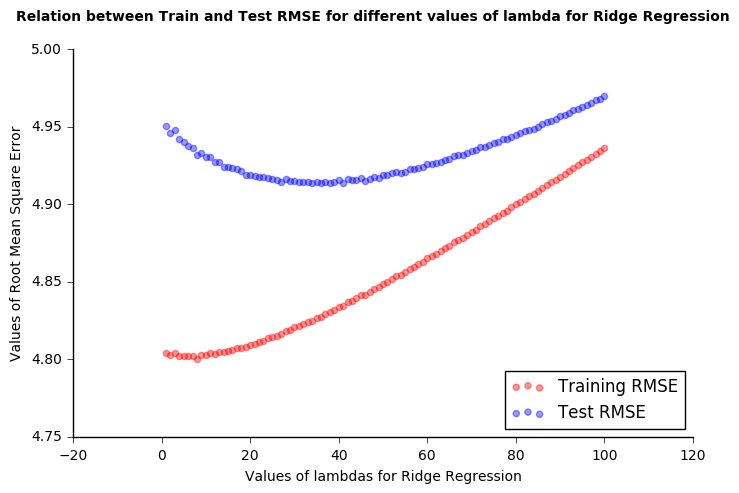

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(lambdas, rmse_training_all, color='red', label="Training RMSE", alpha=0.4)
plt.scatter(lambdas, rmse_test_all, color='blue', label="Test RMSE", alpha=0.4)
plt.xlabel("Values of lambdas for Ridge Regression")
plt.ylabel("Values of Root Mean Square Error")
fig.suptitle('Relation between Train and Test RMSE for different values of lambda for Ridge Regression',
             fontweight='bold', fontsize = 10)
#removing top and right ticks
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='both', direction='out') 
# remove unneeded ticks 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
#setting location of legend
plt.legend(loc='lower right')
plt.show()


The results show two things: first that the values of Test RMSE are always higher than Training RMSE which was expected. Second, we can see that test RMSE decreases for increasing values of lambda until a minima is reached then it starts increasing. In this case the minima is when lambda is between 30-40. 

### 5.5 Lambda and coefficients

We will also create a parameter plot that shows how the different coefficient estimates change as a function of lambda. 

In [43]:
lambdas=np.linspace(1,100,100)
X = boston_df.drop(['MEDV','EXPENSIVE'], axis = 1)
X= np.array(standardize(X))
#X = np.array(boston_df['RM']).reshape(len(boston_df),1)
y= np.array(boston_df['MEDV'])
X_slopes = np.empty([len(lambdas),13], dtype=float, order='C')
for i in lambdas:
    intercept, slopes, final_stats = multivariate_ridge(X, y, 0.01, 100000,i)
    X_slopes= np.insert(X_slopes, 0, slopes,0)
X_slopes= X_slopes[:len(lambdas),:]

In [44]:
labels = np.array(boston_df.drop(['MEDV','EXPENSIVE'], axis = 1).columns)
labels.shape

(13,)

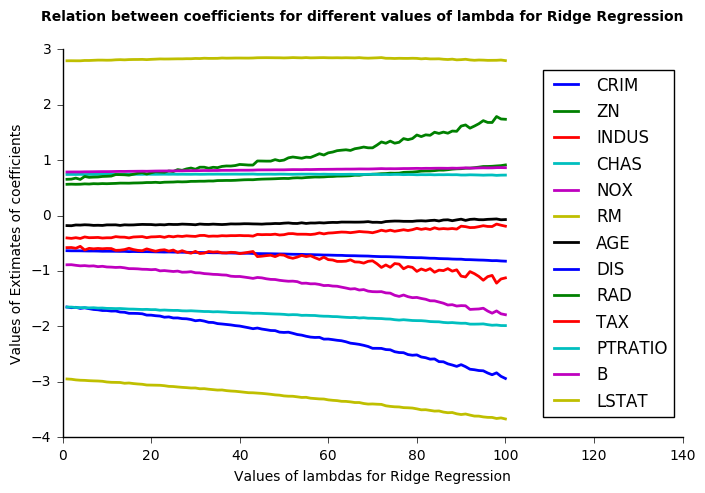

In [45]:

fig, ax = plt.subplots(figsize=(8, 5))

for i in range(0,X_slopes.shape[1]):
    plt.plot(lambdas, X_slopes[:,i],linewidth=2,label=labels[i] )
plt.xlabel("Values of lambdas for Ridge Regression")
plt.ylabel("Values of Extimates of coefficients")
fig.suptitle('Relation between coefficients for different values of lambda for Ridge Regression',
             fontweight='bold', fontsize = 10)
#removing top and right ticks
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='both', direction='out') 
# remove unneeded ticks 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
#setting location of legend
plt.legend(loc='right')
plt.xlim(0,140)
plt.show()


As seen from the graph above we can say that for most features, as we are increasing lambda the values of coefficients are decreasing which is expected as lambda is the penalty paramater and the higher its value, higher would be the penalty over the features.